## 2.1

In [2]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

PI2 = 2 * math.pi

Реализуем класс SawtoothSignal. ОН будет наслеником класса Signal и будет позволять создать пилообразный сигнал

In [3]:
class SawtoothSignal(thinkdsp.Sinusoid):    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

Пилообразный сигнал:

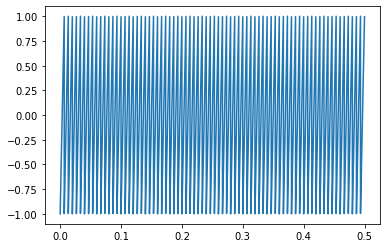

In [5]:
sawtooth = SawtoothSignal(150).make_wave(duration=0.5, framerate=40000)
sawtooth.plot()

Звук из пилообразного сигнала:

In [6]:
sawtooth.make_audio()

Спектр:

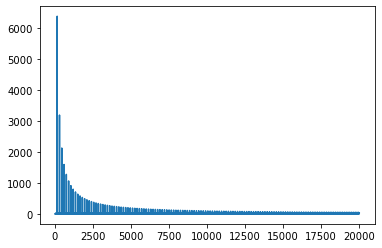

In [8]:
sawtooth.make_spectrum().plot()

Наложим квадратный сигнал:

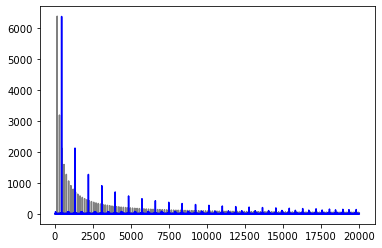

In [11]:
sawtooth.make_spectrum().plot(color='gray')
square = thinkdsp.SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot(color='blue')

Спад пилообразных сигналов происходит аналогично спаду прямоугольных.

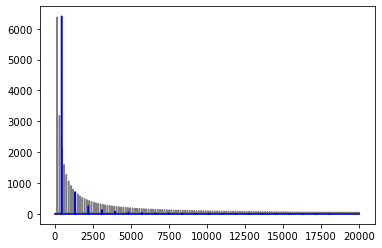

In [12]:
sawtooth.make_spectrum().plot(color='gray')
triangle = thinkdsp.TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot(color='blue')

В отличии от пилообразных гармоник, у треугольных спад протекает значительно быстрее.

## 2.2

Создадим прямоугольную волну:

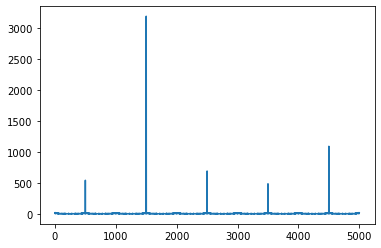

In [33]:
square = thinkdsp.SquareSignal(1500).make_wave(duration=0.5, framerate=10000)
square.make_spectrum().plot()

Вы можете видеть основную гармонику на частоте 1500 Гц и первую гармонику на частоте 4500 Гц, но вторая гармоника, которая должна быть на частоте 7500 Гц, смещается на 2500 Гц. Третья гармоника, которая должна быть на частоте 10500 Гц, будет наложена на -500 Гц, но она снова будет наложена на 500 Гц.

In [16]:
square.make_audio()

In [17]:
thinkdsp.SinSignal(500).make_wave(duration=0.5, framerate=10000).make_audio()

# 2.3

Создадим треугольный сигнал:

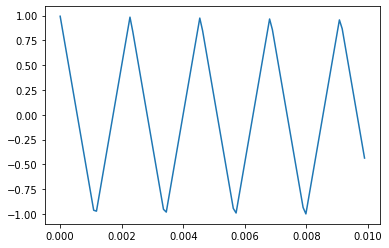

In [18]:
triangle = thinkdsp.TriangleSignal().make_wave(duration=0.01)
triangle.plot()

Первый элемент спектра - комплексное число, близкое к нулю.

In [19]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Добавив компонент нулевой частоты, мы вертикально сместим волну.

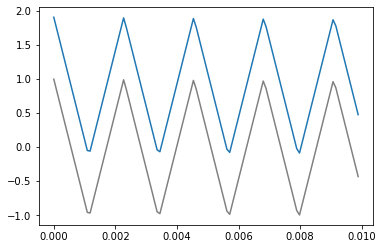

In [20]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()

# 2.4

Реализуем метод-фильтр:

In [21]:
def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

Результат создания треугольного сигнала:

In [22]:
wave = thinkdsp.TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

Проделаем манипуляции со спектром при помощи нашей функции:

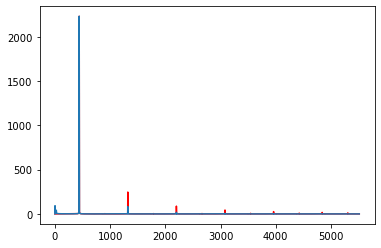

In [25]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='red')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)

Фильтр подавляет гармоники, поэтому он действует как фильтр нижних частот.

In [26]:
filtered = spectrum.make_wave()
filtered.make_audio()

Треугольная волна теперь звучит почти как синусоида.

# 2.5

Создание пилообразного сигнала:

In [27]:
freq = 500
signal = thinkdsp.SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=30000)
wave.make_audio()

Спектр:

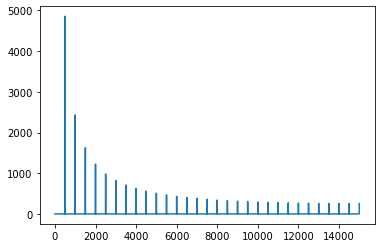

In [28]:
spectrum = wave.make_spectrum()
spectrum.plot()

При наложении видно, что спад происходит как 1/𝑓2 

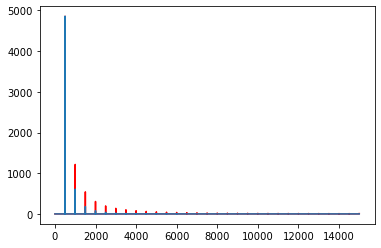

In [30]:
spectrum.plot(color='red')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

Прослушаем звук:

In [31]:
wave = spectrum.make_wave()
wave.make_audio()

И отобразим нашу волну

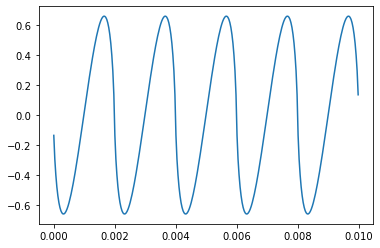

In [99]:
wave.segment(duration=0.01).plot()

In [ ]:
Наш сигнал стал крайне похожим на синусоиду.